# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="pink"><h1>STUDENT GRADE PREDICTION PROJECT</h1></font></div>

## Description 
The dataset "The_Grades_Dataset.csv" comprises 571 rows and 43 columns, representing student academic records. The goal is to predict the Cumulative Grade Point Average (CGPA) at the end of the fourth year using machine learning models.

Three models are developed:

- Model 1: Predicts CGPA based on first-year Grade Points.
- Model 2: Predicts CGPA based on Grade Points from the first two years.
- Model 3: Predicts CGPA based on Grade Points from the first three years.

Linear Regression and Random Forest models are employed for training and evaluation. These models learn from historical data, aiming to forecast final CGPA using earlier academic performance. The dataset includes course grades, credit hours, and CGPA. The models are trained on a subset of the data and evaluated for predictive accuracy.

In summary, the objective is to create models that use past academic performance to predict a student's fourth-year CGPA, providing insights into overall academic achievement.

## Objective
1. Importing Data:
2. Data Exploration:
3. Data Cleaning:
4. Machine Learning:
  > - Linear Regression
  > - Random Forest Regression

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import (KFold, StratifiedKFold, GridSearchCV, learning_curve, validation_curve)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA 
from sklearn.base import TransformerMixin 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from collections import Counter

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.head(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [4]:
df.tail(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
556,CS-97557,A,B+,A+,A,A,B+,A-,B,A-,...,A,A-,A,B+,A,B,A,B+,A,3.624
557,CS-97558,B+,C+,B,A-,B-,B+,B+,C,B,...,C-,C,A-,C,C+,D+,B,C-,C,2.429
558,CS-97559,A-,B-,A,A,A-,A,B+,A-,B+,...,B+,B+,A,B,C,D,A-,D+,C,3.172
559,CS-97560,A-,C+,A,B,B,A-,C+,D,B,...,B+,B-,A,A-,A,C,B+,B+,A-,3.226
560,CS-97561,B+,C-,A,D+,C+,A-,C-,C+,C+,...,B+,C,B+,C-,C-,F,C,D,C-,2.370
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


## Data Exploration

In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [6]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
df.isnull().sum().sum()

425

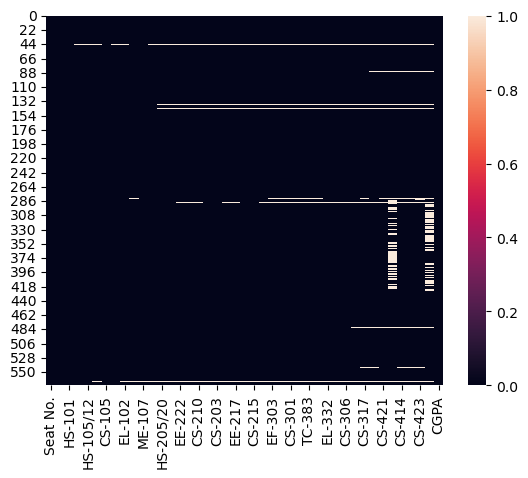

In [10]:
sns.heatmap(df.isnull())
plt.show()

As we can see there are null values in our data , so we will replace them by 0.

In [11]:
df.replace(np.nan, 0, inplace=True)
df.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [12]:
# Setting input and target variables
input = df.drop(["CS-403", "CS-421", "CS-406", "CS-414", "CS-419", "CS-423", "CS-412", 'MT-442', "Seat No.", "CGPA"], axis=1)
target = df[["CGPA"]]

In [13]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [14]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [15]:
grades_nv = {'B-': 2.7, 'A': 4, 'D': 1.0, 'A-': 3.7, 'B+': 3.4, 'B': 3.0, 'C+': 2.4, 'C': 2.0, 'C-': 1.7, 'D+': 1.4, 'WU': 0.0, 'A+': 4, 'F': 0.0, 'W': 0, 'I': 0}

In [16]:
for item in input:
      input[item] = input[item].replace(grades_nv)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [17]:
# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)

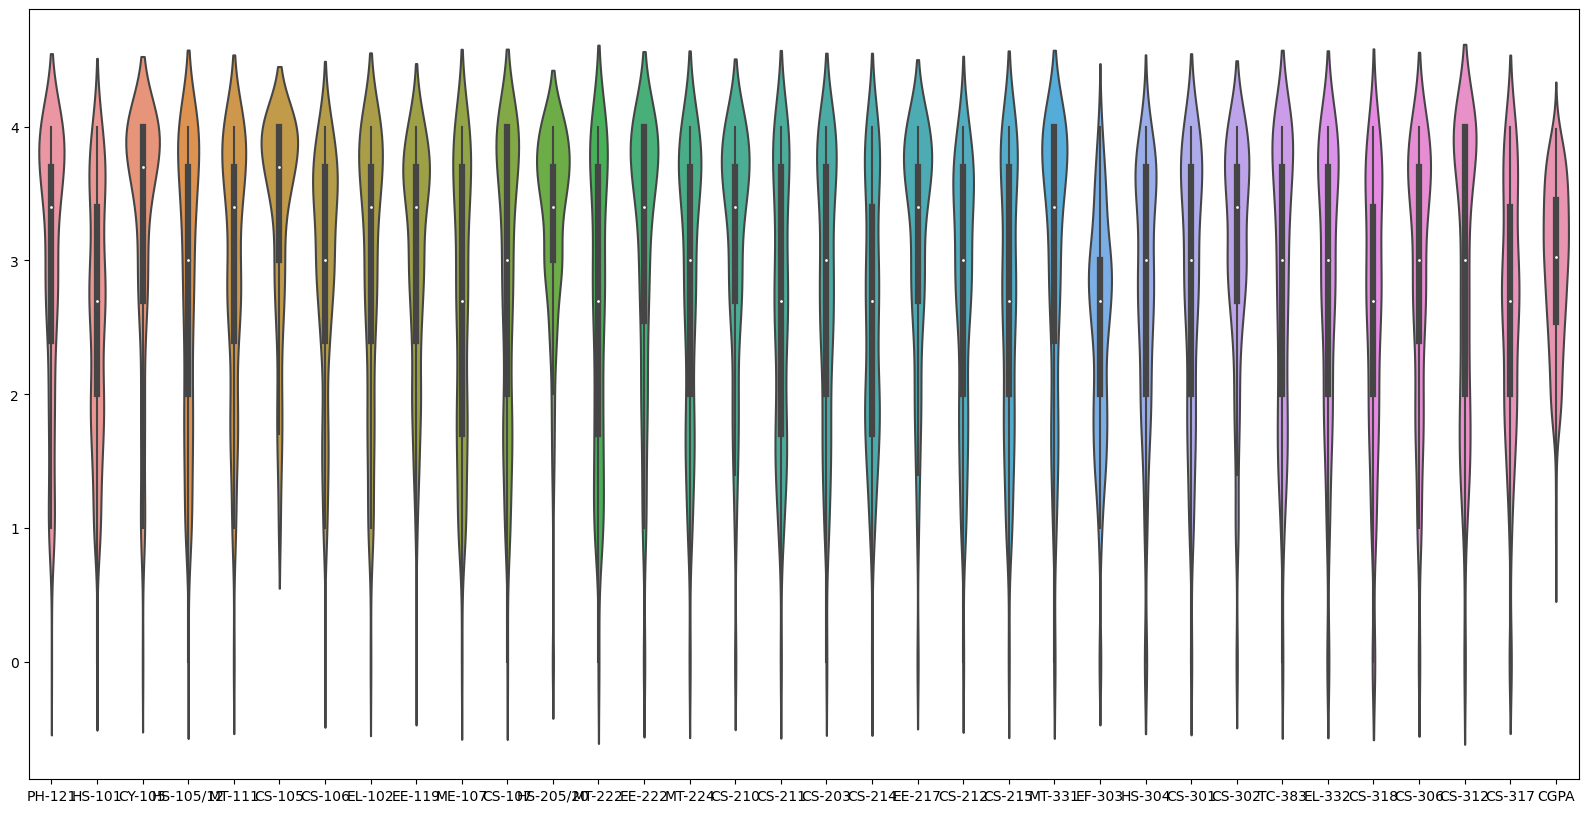

In [18]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df)
plt.show()

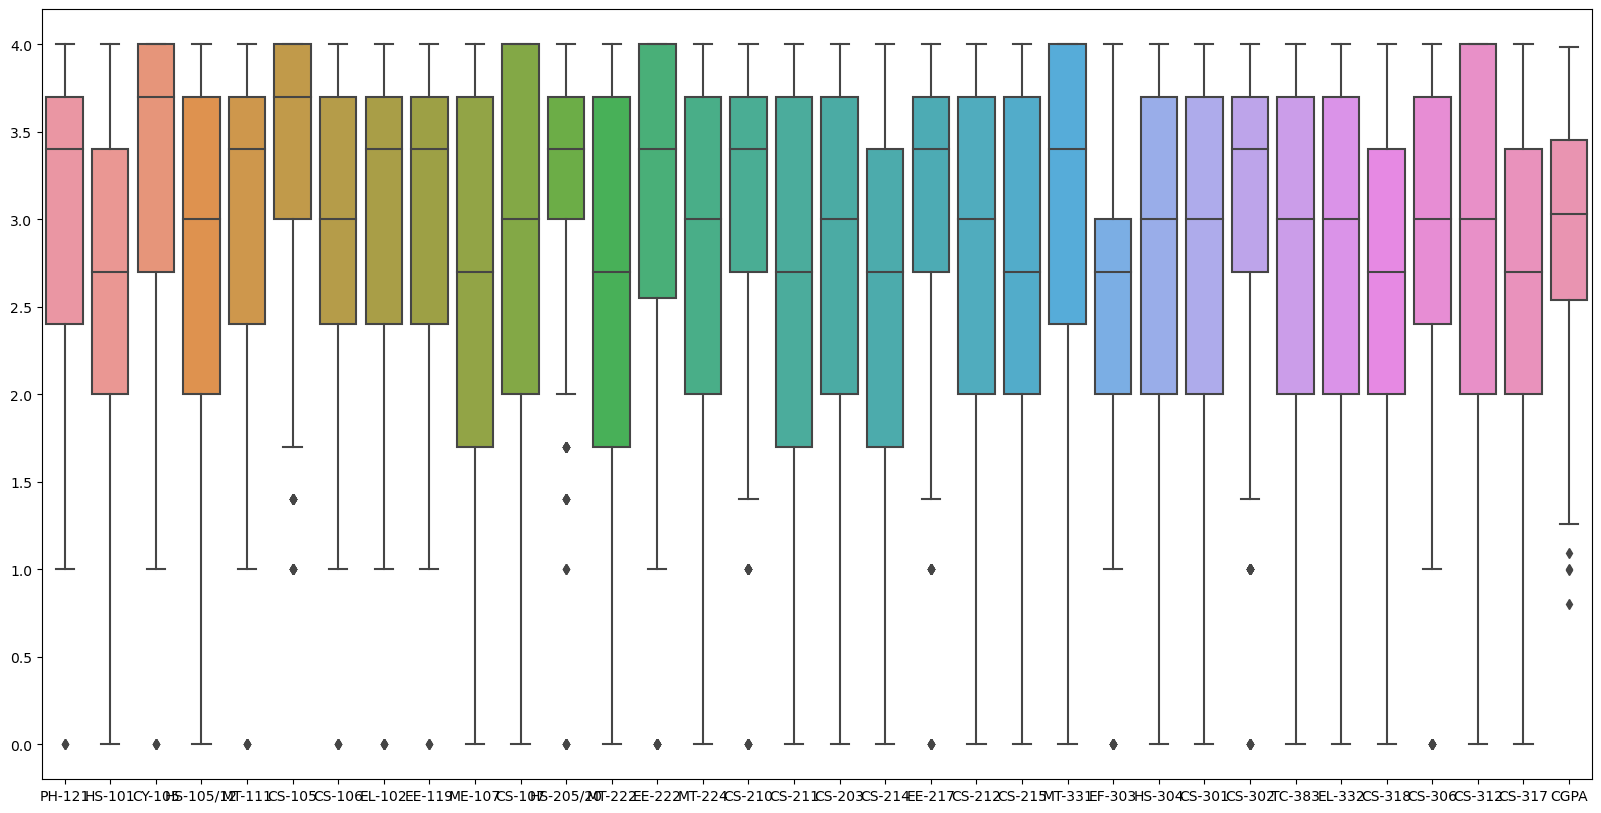

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()

<Axes: >

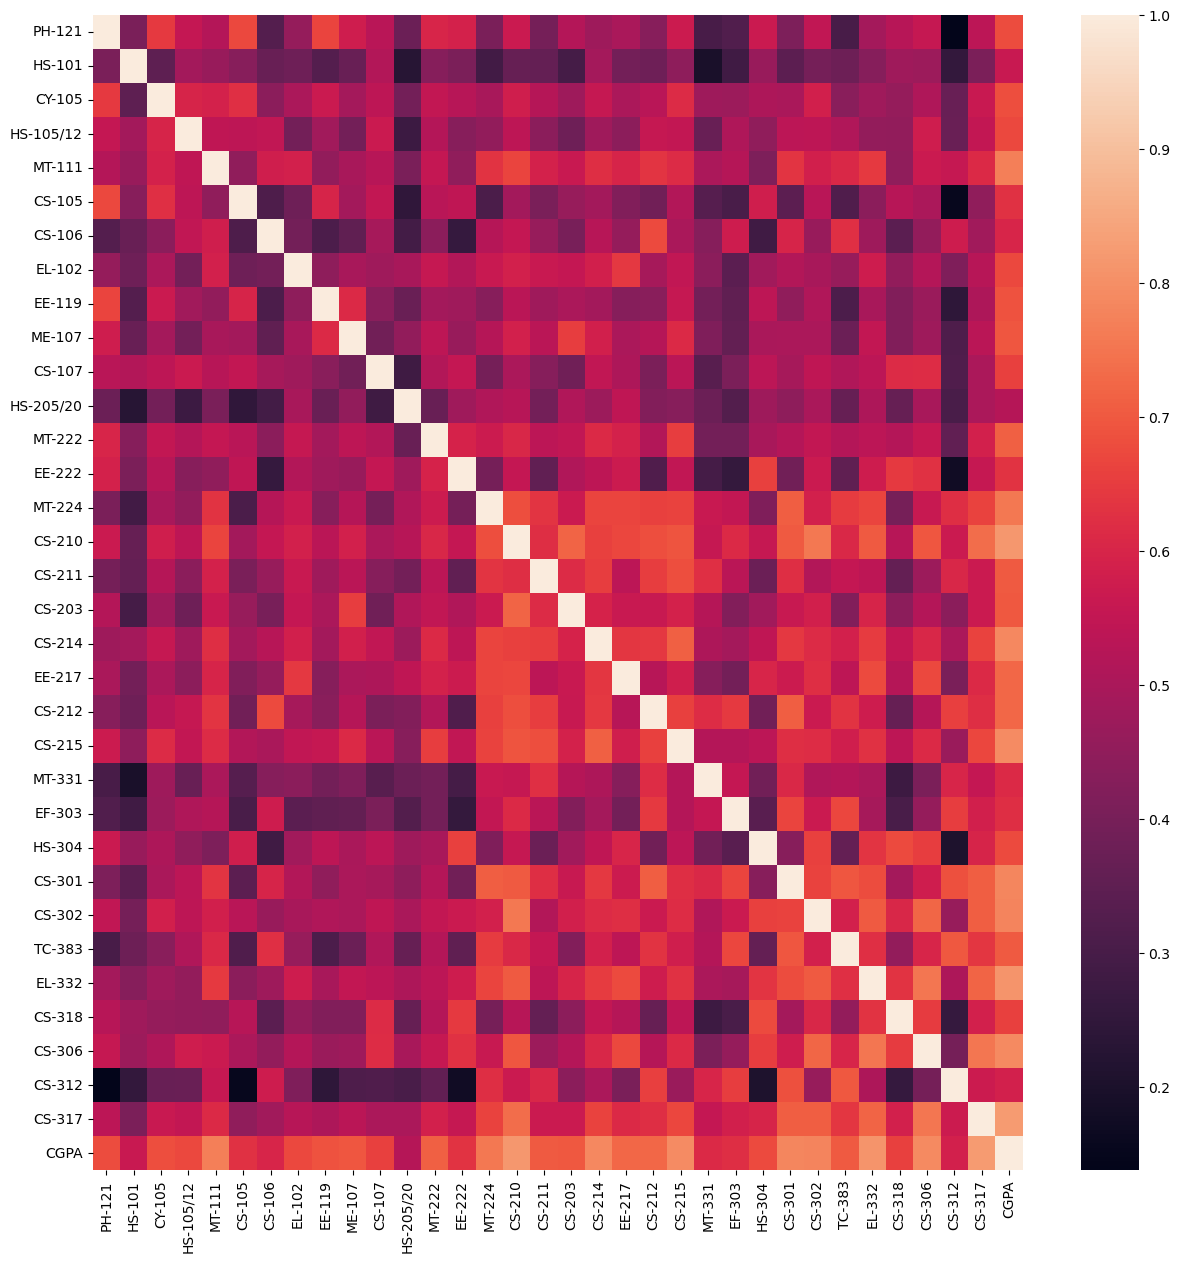

In [20]:
# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [21]:
df.to_csv('cleaned_data.csv')

## Machine Learning 

In [22]:
# Models for all years
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns

Model Performance for Training Set - 1st Year Model:
Training RMSE: 0.22501331665662536
Training MAE: 0.17585479617478914
---------------------------------------------------
Model Performance for Testing Set - 1st Year Model:
Testing RMSE: 0.2563405799354603
Testing MAE: 0.19844121708333012
---------------------------------------------------
Model Score for Testing Set - 1st Year Model:
R-squared: 0.81
---------------------------------------------------
Model Performance for Training Set - First Two Years Model:
Training RMSE: 0.15911223714395076
Training MAE: 0.11364396001018592
---------------------------------------------------
Model Performance for Testing Set - First Two Years Model:
Testing RMSE: 0.21339897395089674
Testing MAE: 0.13781643042026046
---------------------------------------------------
Model Score for Testing Set - First Two Years Model:
R-squared: 0.87
---------------------------------------------------
Model Performance for Training Set - First Three Years Model:


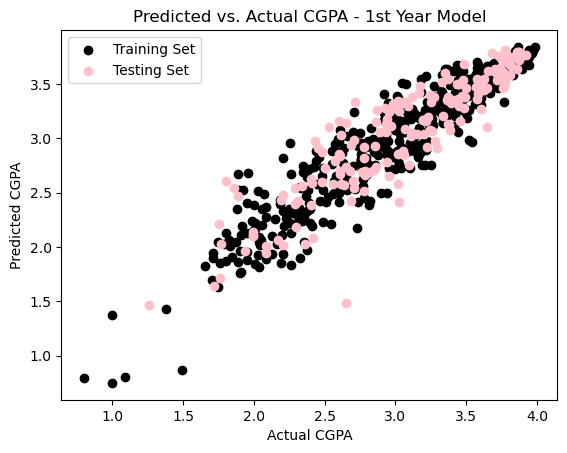

2) For First Two Years Model:


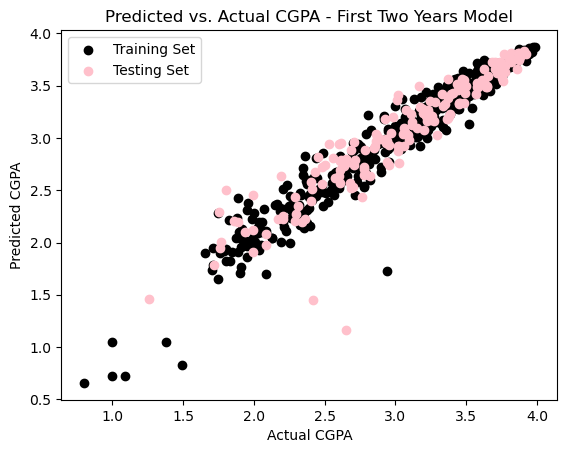

3) For First Three Years Model:


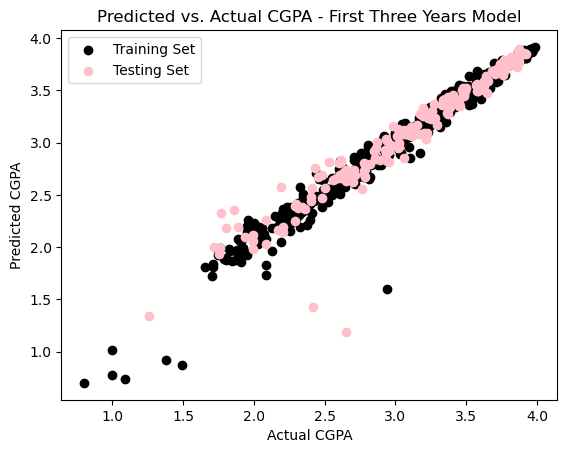

In [23]:
# Linear Regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def train_and_evaluate_model(features, labels, model_name):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)  
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # training set
    mse_train = mean_squared_error(y_train, y_train_predict)
    mae_train = mean_absolute_error(y_train, y_train_predict)

    print(f"Model Performance for Training Set - {model_name}:")
    print(f'Training RMSE: {np.sqrt(mse_train)}')
    print(f'Training MAE: {mae_train}')
    print("---------------------------------------------------")

    # testing set
    mse_test = mean_squared_error(y_test, y_test_predict)
    mae_test = mean_absolute_error(y_test, y_test_predict)

    print(f"Model Performance for Testing Set - {model_name}:")
    print(f'Testing RMSE: {np.sqrt(mse_test)}')
    print(f'Testing MAE: {mae_test}')
    print("---------------------------------------------------")

    test_score = model.score(X_test, y_test)
    print(f"Model Score for Testing Set - {model_name}:")
    print(f'R-squared: {test_score.round(2)}')
    print("---------------------------------------------------")

    return model

features_model1 = df[model1_columns].values
labels_model1 = df['CGPA'].values

features_model2 = df[model2_columns].values
labels_model2 = df['CGPA'].values

features_model3 = df[model3_columns].values
labels_model3 = df['CGPA'].values

lr_1 = train_and_evaluate_model(features_model1, labels_model1, "1st Year Model")
lr_2 = train_and_evaluate_model(features_model2, labels_model2, "First Two Years Model")
lr_3 = train_and_evaluate_model(features_model3, labels_model3, "First Three Years Model")

def visualize_predictions(features, labels, model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.scatter(y_train, y_train_pred, color='black', label='Training Set')
    plt.scatter(y_test, y_test_pred, color='pink', label='Testing Set')

    plt.xlabel('Actual CGPA')
    plt.ylabel('Predicted CGPA')
    plt.title(f'Predicted vs. Actual CGPA - {model_name}')
    plt.legend()
    plt.show()

print("1) For 1st Year Model:")
visualize_predictions(features_model1, labels_model1, lr_1, "1st Year Model")

print("2) For First Two Years Model:")
visualize_predictions(features_model2, labels_model2, lr_2, "First Two Years Model")

print("3) For First Three Years Model:")
visualize_predictions(features_model3, labels_model3, lr_3, "First Three Years Model")

Random Forest Model Performance for Training Set - 1st Year Model:
Training RMSE: 0.08891960215903766
Training MAE: 0.06933431077694203
---------------------------------------------------
Random Forest Model Performance for Testing Set - 1st Year Model:
Testing RMSE: 0.2521590476498864
Testing MAE: 0.20266170348837217
---------------------------------------------------
Random Forest Model Score for Testing Set - 1st Year Model:
R-squared: 0.81
---------------------------------------------------
Random Forest Model Performance for Training Set - First Two Years Model:
Training RMSE: 0.07114604798659063
Training MAE: 0.05070659147869635
---------------------------------------------------
Random Forest Model Performance for Testing Set - First Two Years Model:
Testing RMSE: 0.19624653454354005
Testing MAE: 0.13661703488372087
---------------------------------------------------
Random Forest Model Score for Testing Set - First Two Years Model:
R-squared: 0.89
------------------------------

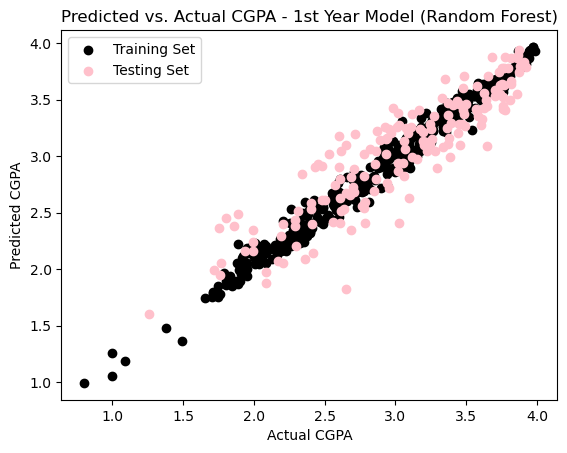

2) For First Two Years Model (Random Forest):


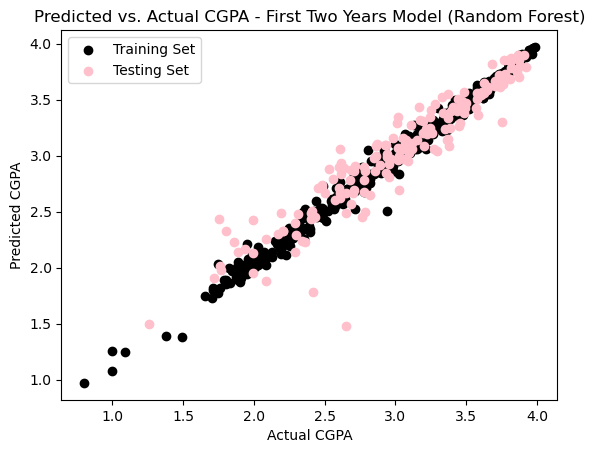

3) For First Three Years Model (Random Forest):


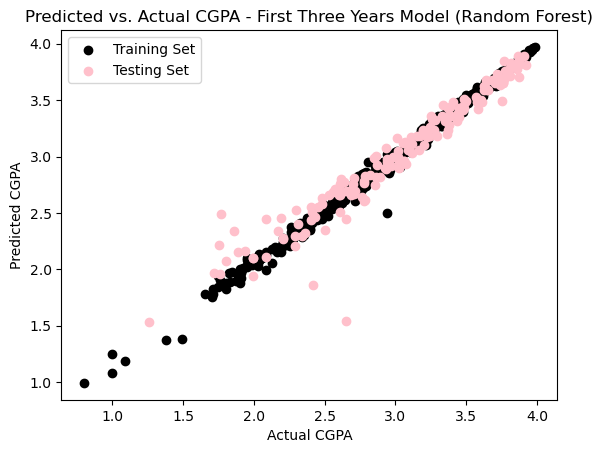

In [24]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

def train_and_evaluate_random_forest(features, labels, model_name):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # predictions
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # training set
    mse_train = mean_squared_error(y_train, y_train_predict)
    mae_train = mean_absolute_error(y_train, y_train_predict)

    print(f"Random Forest Model Performance for Training Set - {model_name}:")
    print(f'Training RMSE: {np.sqrt(mse_train)}')
    print(f'Training MAE: {mae_train}')
    print("---------------------------------------------------")

    # testing set
    mse_test = mean_squared_error(y_test, y_test_predict)
    mae_test = mean_absolute_error(y_test, y_test_predict)

    print(f"Random Forest Model Performance for Testing Set - {model_name}:")
    print(f'Testing RMSE: {np.sqrt(mse_test)}')
    print(f'Testing MAE: {mae_test}')
    print("---------------------------------------------------")

    test_score = model.score(X_test, y_test)
    print(f"Random Forest Model Score for Testing Set - {model_name}:")
    print(f'R-squared: {test_score.round(2)}')
    print("---------------------------------------------------")

    return model, y_train, y_train_predict, y_test, y_test_predict

rf_1, y_train_rf_1, y_train_pred_rf_1, y_test_rf_1, y_test_pred_rf_1 = train_and_evaluate_random_forest(features_model1, labels_model1, "1st Year Model")
rf_2, y_train_rf_2, y_train_pred_rf_2, y_test_rf_2, y_test_pred_rf_2 = train_and_evaluate_random_forest(features_model2, labels_model2, "First Two Years Model")
rf_3, y_train_rf_3, y_train_pred_rf_3, y_test_rf_3, y_test_pred_rf_3 = train_and_evaluate_random_forest(features_model3, labels_model3, "First Three Years Model")

# Visualize 
# Visualize 
print("1) For 1st Year Model (Random Forest):")
visualize_predictions(features_model1, labels_model1, rf_1, "1st Year Model (Random Forest)")

print("2) For First Two Years Model (Random Forest):")
visualize_predictions(features_model2, labels_model2, rf_2, "First Two Years Model (Random Forest)")

print("3) For First Three Years Model (Random Forest):")
visualize_predictions(features_model3, labels_model3, rf_3, "First Three Years Model (Random Forest)")

In [25]:
del input

In [26]:
# Final Model
import numpy as np

print("************************************************************")
print("---------------------CGPA Predictor ------------------------")
print("************************************************************")

model_1 = []
model_2 = []
model_3 = []
input_lr = []

name = input("What is your name? ")
model = int(input("Which CGPA prediction model would you preffer to use? (1, 2, or 3): "))

def get_gpa_input(model_columns, model_list):
    for val in model_columns:
        while True:
            try:
                string = f"Enter your {val} CGPA: "
                GPA = input(string)
                if GPA in grades_nv.keys():
                    model_list.append(grades_nv[GPA])
                    break
                else:
                    print("Invalid CGPA. Please enter a valid CGPA.")
            except ValueError:
                print("Invalid input. Please enter a valid numeric value.")

# Inputs
if model == 1:
    get_gpa_input(model1_columns, model_1)
    input_lr.append(model_1)
    print(f"Hello {name}! Predicted CGPA (Linear Regression): {lr_1.predict(input_lr)[0]:.2f}, (Random Forest): {rf_1.predict(input_lr)[0]:.2f}")
elif model == 2:
    get_gpa_input(model2_columns, model_2)
    input_lr.append(model_2)
    print(f"Hello {name}! Predicted CGPA (Linear Regression): {lr_2.predict(input_lr)[0]:.2f}, (Random Forest): {rf_2.predict(input_lr)[0]:.2f}")
elif model == 3:
    get_gpa_input(model3_columns, model_3)
    input_lr.append(model_3)
    print(f"Hello {name}! Predicted CGPA (Linear Regression): {lr_3.predict(input_lr)[0]:.2f}, (Random Forest): {rf_3.predict(input_lr)[0]:.2f}")
else:
    print("Invalid model selection. Please enter a valid model number (1, 2, or 3).")

print("Thankyou!")

************************************************************
---------------------CGPA Predictor ------------------------
************************************************************
What is your name? Mahima
Which CGPA prediction model would you preffer to use? (1, 2, or 3): 1
Enter your PH-121 CGPA: A
Enter your HS-101 CGPA: A
Enter your CY-105 CGPA: A
Enter your HS-105/12 CGPA: A
Enter your MT-111 CGPA: B
Enter your CS-105 CGPA: B
Enter your CS-106 CGPA: B
Enter your EL-102 CGPA: A
Enter your EE-119 CGPA: A
Enter your ME-107 CGPA: A
Enter your CS-107 CGPA: A
Hello Mahima! Predicted CGPA (Linear Regression): 3.56, (Random Forest): 3.50
Thankyou!


# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="pink"><h1>Thankyou!</h1></font></div>